<a href="https://colab.research.google.com/github/vladlesnyh/optimization/blob/main/%D0%9F%D0%BE%D1%82%D0%BE%D0%BA%D0%B8_%D1%81_%D0%BC%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B7%D0%B0%D1%82%D1%80%D0%B0%D1%82%D0%B0%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Потоки с минимальными затратами

С проблемой максимального потока тесно связана задача о потоке с **минимальной стоимостью** **( min cost )**, в которой каждая дуга на графике имеет стоимость единицы транспортировки материала через нее. Задача состоит в том, чтобы найти поток с наименьшей общей стоимостью.

Задача о минимальном потоке затрат также имеет специальные узлы, называемые узлами предложения или узлами спроса, которые аналогичны источнику и стоку в задаче о максимальном потоке . Материал транспортируется от узлов снабжения к узлам спроса.

В **узле предложения** к потоку добавляется положительная сумма — предложение. Например, предложение может представлять собой производство в этом узле.
В **узле спроса** из потока забирается отрицательная сумма — спрос. Например, спрос может представлять потребление в этом узле.
Для удобства мы предположим, что все узлы, кроме узлов спроса и предложения, имеют нулевое предложение (и спрос).

Для задачи потока минимальных затрат у нас есть следующее правило сохранения потока, которое учитывает спрос и предложение:

**Примечание**. В каждом узле общий поток, выходящий из узла, минус общий поток, входящий в узел, равен предложению (или спросу) в этом узле.

На графике ниже показана задача о минимальном потоке затрат. Дуги помечены парами чисел: первое число — это мощность, второе — стоимость. Числа в скобках рядом с узлами обозначают предложение или спрос. Узел 0 — это узел предложения с предложением 20, а узлы 3 и 4 — это узлы спроса со спросом -5 и -15 соответственно.
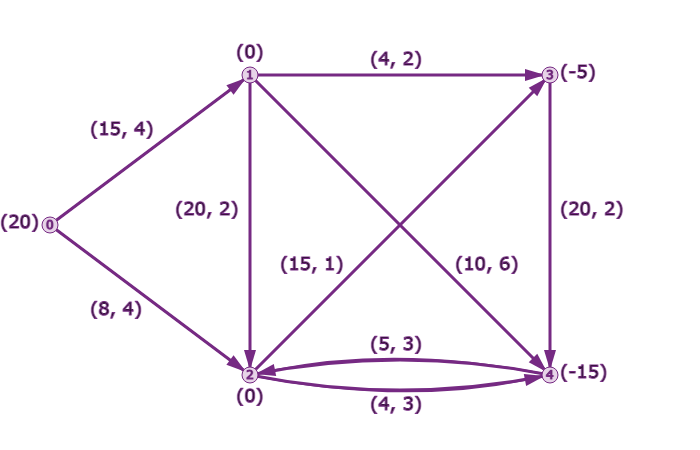

**Импортируйте библиотеки**

Следующий код импортирует необходимую библиотеку.

In [14]:
!pip install ortools

In [15]:
import numpy as np

from ortools.graph.python import min_cost_flow

**Объявить решатель**

Для решения задачи воспользуемся решателем SimpleMinCostFlow .

In [16]:
# Объявим решатель.
smcf = min_cost_flow.SimpleMinCostFlow()

**Определите данные**

Следующий код определяет данные для задачи. В этом случае имеется четыре массива для начальных узлов, конечных узлов, мощностей и стоимости единицы продукции. Опять же, длина массивов — это количество дуг в графе.

In [17]:
# Зададим 4 параллельных массива: начальные узлы, конечные узлы, вместимости
# и стоимости. Например, дуга из узла 0
# в узел 1 имеет вместимость 15.
start_nodes = np.array([0, 0, 1, 1, 1, 2, 2, 3, 4])
end_nodes = np.array([1, 2, 2, 3, 4, 3, 4, 4, 2])
capacities = np.array([15, 8, 20, 4, 10, 15, 4, 20, 5])
unit_costs = np.array([4, 4, 2, 2, 6, 1, 3, 2, 3])

# Зададим спрос и предложение в каждом узле.
supplies = [20, 0, 0, -5, -15]

**Добавьте дуги**

Для каждого начального узла и конечного узла мы создаем дугу от начального узла до конечного узла с заданной емкостью и стоимостью единицы, используя метод AddArcWithCapacityAndUnitCost .
Метод SetNodeSupply решателя создает вектор поставок для узлов.

In [18]:
# Добавим дуги, вместимости и стоимости в задачу с помощью numpy.
all_arcs = smcf.add_arcs_with_capacity_and_unit_cost(
    start_nodes, end_nodes, capacities, unit_costs
)

# Добавим спрос и предложение в каждый узел.
smcf.set_nodes_supplies(np.arange(0, len(supplies)), supplies)

**Вызов решателя**

Теперь, когда все дуги определены, остается только вызвать решатель и отобразить результаты. Мы вызываем метод Solve()

In [19]:
# Найдем минимальную стоимость.
status = smcf.solve()

**Отображение результатов**

Теперь мы можем отображать поток и стоимость по каждой дуге.

In [20]:
if status != smcf.OPTIMAL:
    print("There was an issue with the min cost flow input.")
    print(f"Status: {status}")
    exit(1)
print(f"Минимальная стоимость: {smcf.optimal_cost()}")
print("")
print(" Дуга    Поток / Вместимость Стоимость")
solution_flows = smcf.flows(all_arcs)
costs = solution_flows * unit_costs
for arc, flow, cost in zip(all_arcs, solution_flows, costs):
    print(
        f"{smcf.tail(arc):1} -> {smcf.head(arc)}  {flow:3}  / {smcf.capacity(arc):3}       {cost}"
    )

Минимальная стоимость: 150

 Дуга    Поток / Вместимость Стоимость
0 -> 1   12  /  15       48
0 -> 2    8  /   8       32
1 -> 2    8  /  20       16
1 -> 3    4  /   4       8
1 -> 4    0  /  10       0
2 -> 3   12  /  15       12
2 -> 4    4  /   4       12
3 -> 4   11  /  20       22
4 -> 2    0  /   5       0
